<a href="https://colab.research.google.com/github/FoxCoder-hub/Production-Planning-Optimization/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mplcursors

# !pip install mplcursors  # Uncomment if needed
import matplotlib.pyplot as plt
import mplcursors

# Data
d1 = [1400, 1700, 1000, 1100, 1300, 1500]
d2 = [2400, 1800, 1200, 700, 900, 1900]

# Heuristic function
def solution_heuristique(d1, d2):
    effectif_initial = 65
    effectif = [effectif_initial] * 7
    embauches = [0] * 6
    licenciements = [0] * 6
    cout_total = 0

    for i in range(6):
        production_p1 = min(d1[i], effectif[i] * 8 * 20 / 3.5)
        production_p2 = min(d2[i], effectif[i] * 8 * 20 / 2.5)

        total_prod_time = production_p1 * 3.5 + production_p2 * 2.5
        max_time = 160 * effectif[i]

        if total_prod_time > max_time:
            embauches[i] = max(0, int(total_prod_time / 160) - effectif[i])
            cout_total += embauches[i] * 800
        elif total_prod_time < max_time:
            licenciements[i] = max(0, effectif[i] - int(total_prod_time / 160))
            cout_total += licenciements[i] * 1600

        effectif[i+1] = effectif[i] + embauches[i] - licenciements[i]
        cout_travail = effectif[i] * 8 * 20 * 18
        cout_production_mois = (production_p1 + production_p2) * 45
        cout_total += cout_production_mois + cout_travail

    return embauches, licenciements, cout_total

# Plot functions
def plot_production():
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 7), [sum(d1[:i]) for i in range(1, 7)], label='Production P1')
    plt.plot(range(1, 7), [sum(d2[:i]) for i in range(1, 7)], label='Production P2')
    plt.title('Production cumulative')
    plt.xlabel('Mois')
    plt.ylabel('Production')
    plt.legend()
    mplcursors.cursor(hover=True)
    plt.show()

def plot_demand():
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 7), d1, label='Demande P1')
    plt.plot(range(1, 7), d2, label='Demande P2')
    plt.title('Demande mensuelle')
    plt.xlabel('Mois')
    plt.ylabel('Demande')
    plt.legend()
    mplcursors.cursor(hover=True)
    plt.show()

def plot_hiring_firing():
    embauches, licenciements, _ = solution_heuristique(d1, d2)
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 7), embauches, label='Embauches')
    plt.plot(range(1, 7), licenciements, label='Licenciements')
    plt.title('Embauches et Licenciements')
    plt.xlabel('Mois')
    plt.ylabel('Nombre d\'employés')
    plt.legend()
    mplcursors.cursor(hover=True)
    plt.show()

def print_total_cost():
    _, _, cout_total = solution_heuristique(d1, d2)
    print(f"Coût total : {cout_total} DT")


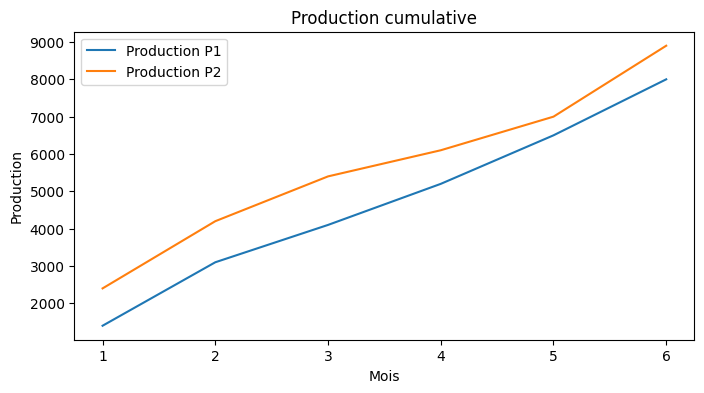

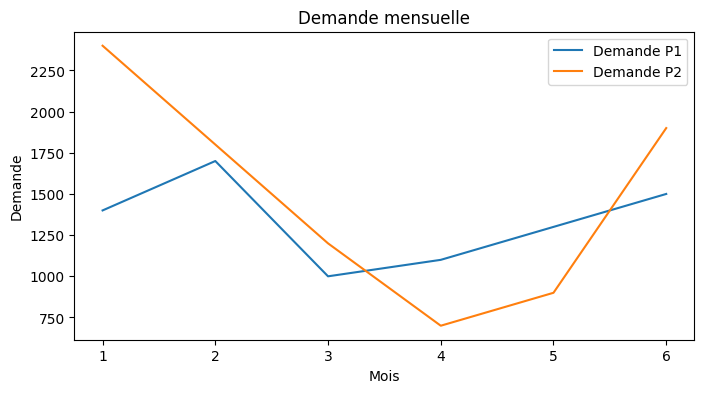

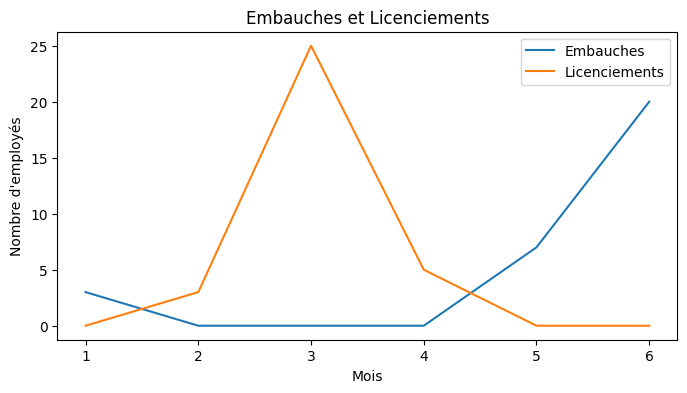

Coût total : 1744500 DT


In [3]:
plot_production()
plot_demand()
plot_hiring_firing()
print_total_cost()
